# 워드클라우드 (한글, Mecab)

## 1. 형태소 분석의 이해
- 형태소:
    - 의미가 있는 최소의 단위 (minimally meaningful unit)
    - 문법적, 관계적인 뜻을 나타내는 단어 또는 단어의 부분
    - 일정한 범위 안에서 쓰이는 낱말의 총체
    - 즉, 문법적으로 더 이상 나눌 수 없는 언어 요소
- 영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야 한다. (konlpy, mecab 등)
- 형태소 분석 예시
    - 형태소 사전에 수록된 어휘를 기준으로 분석
    
```plain
사랑하다 = 사랑 + 하 + 다, 사랑하 + 다
알뜰하다 = 알뜰 + 하 + 다, 알뜰하 + 다
```

## 2. KoNLPy(OKT)를 사용한 형태소 분석
- KoNLPy는 한국어 정보처리를 위한 파이썬 패키지
- 자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이때 한국어 데이터 전처리를 할 떄 많이 사용하는 패키지
- JAVA를 기반으로 만들어져 있어서 패키지 설치를 위해서는 JAVA 개발 환경이 구성되어 있어야 한다.
### 1) 현재 컴퓨터의 JAVA환경 구성여부 확인
$ java --version
- 설치가 필요한 경우 아래와 같이 에러 메시지가 묘시된다.
```plain
'javac'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다
```
### 2) OpenJDK 다운로드
- 권장 버전: 19
- https://jdk.java.net/19/ 페이지에서 자신의 버전에 맞는 파일을 내려 받는다.
- 다운로드 받은 파일을 적절한 위치에 압축 해제한다.
```Plain
예) C:\jdk-19.0.2
```
### 3) 환경변수 설정
- 환경변수 입력 화면 열기
    1. 폴더창 좌측 트리에서 `내 PC` 마우스 우클릭 하여 속성 메뉴 선택
    2. `설정`화면이 나타나면 오른쪽에서 `고급 시스템 설정` 클릭
    3. 나타난 화면 하단의 `환경 변수` 버튼 클릭
- `JAVA_HOME` 변수 추가
    1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `새로 만들기` 버튼 클릭
    2. 변수 이름에 `JAVA_HOME`
    3. 변수 값에 JDK의 경로 입력
        - 예: `C:\jdk-19.0.2`
    4. `확인`을 눌러 입력창 닫기
- `Path` 변수 추가
    1. `환경 변수` 화면 아래쪽의 `시스템 변수` 영역에서 `Path` 항목을 찾아 선택하고 `편집` 버튼 클릭
    2. 맨 아래 빈 행을 더블클릭 하여 입력 상태로 만들고 JDK 설치 폴더 내의 `bin` 디렉토리까지의 경로를 입력
        - 예: `C:\jdk-19.0.2\bin`
    3. `확인`을 눌러 모든 창 닫기
- 명령 프롬프트, 폴더창, VSCode 등 모든 프로그램을 닫은 후 명령 프롬프트에서 `javac --version` 명령으로 설정이 잘 되었는지 확인

### 4) 형태소 분석 설치
- `konlpy` 패키지 설치 필요
### 5) 형태소 분석 테스트
#### 패키지 참조

In [1]:
from IPython.display import Image, display
from konlpy.tag import Okt
from wordcloud import WordCloud
import sys
import os

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

# 직접 구현한 모듈 참조
# 소스파일의 위치에 따라 `os.path.dirname` 사용 횟수 조절 필요
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import clearStopwords

#### 형태소 분석 객체 생성

In [2]:
nlp = Okt()

sample = "나는 천재다. 언제나 어디서나 신중하게 고려하여 말하기. 그냥 생각나는 대로 말하기. 왔썹! 안다윤 최고"
# 명사들만 추출 -> 리스트 형식으로 변환
nouns = nlp.nouns(sample)
print(nouns)

['나', '천재', '어디', '서나', '고려', '말', '그냥', '대로', '말', '안다윤', '최고']


#### 사진 구축하기
- konlpy의 설치 경로 확인

In [3]:
import konlpy
konlpy.data.path

['/Users/dayoonz/konlpy_data',
 '/usr/share/konlpy_data',
 '/usr/local/share/konlpy_data',
 '/usr/lib/konlpy_data',
 '/usr/local/lib/konlpy_data',
 '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/konlpy/data']

- 출력되는 마지막 경로의 상위 폴더가 `konlpy` 의 설치 위치로 확인 됨
    > 컴퓨터마다 다를 수 있음
- terminal에 다음과 같이 입력
    1. cd 경로
        > 예) cd /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/konlpy/data
    2. open .
- `konlpy`의 설치 위치 하위의 `java`라는 이름의 폴더에서 `open-korean-text-2.1.0.jar` 파일의 압축을 해제
- 압축을 해제한 폴더 안에서 `names.txt` 파일을 찾음
    > ./open-korean-text-2.1.0/org/openkoreantext/processor/util/noun
- `txt`파일이 위치하는 폴더 안에 임의의 텍스트 파일을 영문이름, 공백금지, UTF-8 형태로 생성하고 그 안에 새로운 단어들을 줄바꿈으로 구분하여 나열
- `open-korean-text-2.1.0` 폴더 위치에서 명령 프롬프트를 열고 아래의 명령으로 jar압축을 수행 (마지막에 현재 폴더를 의미하는 `.` 주의)
> $ jar cvf open-korean-text-2.1.0.jar .
- 생성된 jar 파일을 기존의 파일과 교체 (VSCode 종료 후 파일 교체 해야 함)

## 3. 한글 워드 클라우드

### 1) 분석할 데이터 가져오기

In [4]:
with open('wordcloud/대한민국헌법.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    # print(text)

### 2) 데이터에 대한 형태소 분석

In [5]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

# 명사들만 추출 -> 리스트 형식으로 변환
nouns = nlp.nouns(text)
print(nouns)

['대한민국', '헌법', '시행', '헌법', '제', '호', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수',

### 3) 불용어 목록 가져오기

In [6]:
with open('wordcloud/stopwords-ko.txt', 'r', encoding = 'utf-8') as f:
    stopwords = f.readlines()
    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()

    # print(stopwords)

### 4) 추출된 명사에서 불용어 제거
- 두 개의 리스트를 각각 집합 자료형으로 변환 후 차집합을 구한다

In [7]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)
# print(data_set)

### 5) helper.py에 모듈화 한 기능 테스트

In [8]:
data_set = clearStopwords(nouns)
# data_set

### 6) 리스트로부터 빈도수 측정

In [9]:
count = Counter(data_set)
# count

### 7) 워드클라우드 (한국어) 생성

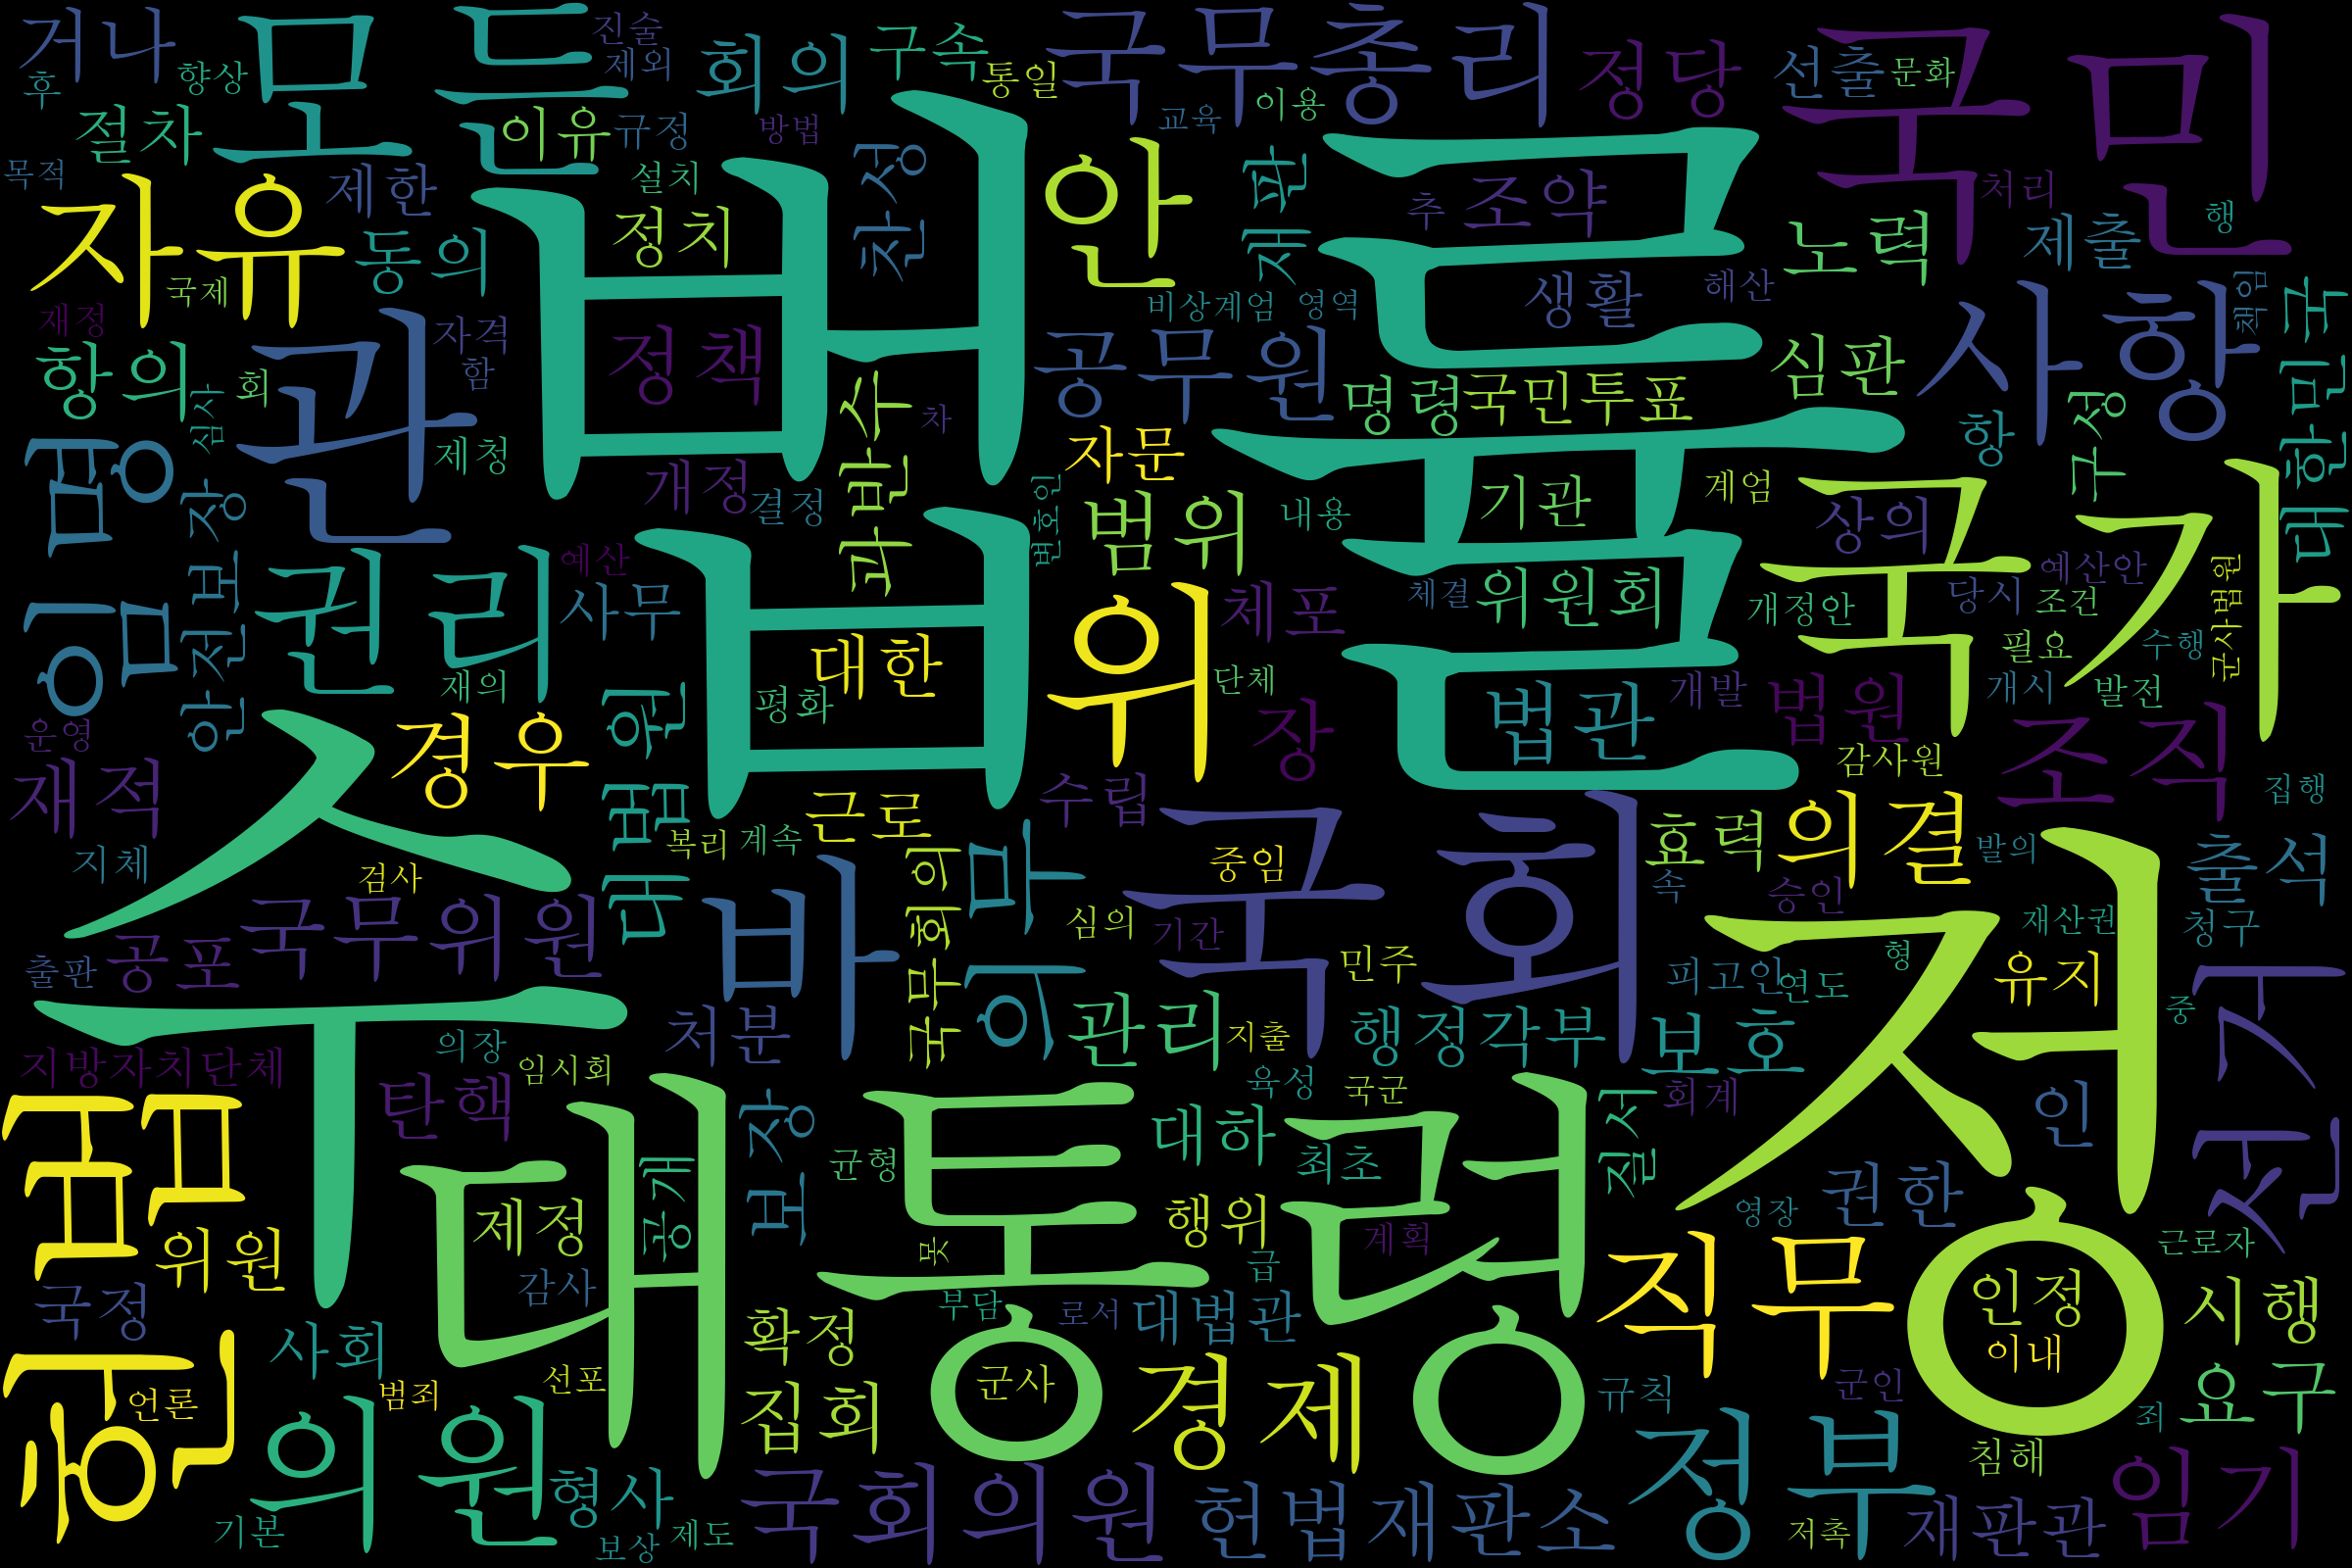

In [10]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path = './wordcloud/batang.ttc', width = 1200, height = 800, scale = 2.0)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다
wc = wc.generate_from_frequencies(count)
wc.to_file('대한민국헌법-주요단어.png')
display(Image(filename = '대한민국헌법-주요단어.png'))

## 4. Mecab 형태소 분석기
### 1) Mecab 소개
- Mecab 형태소 분석기는 일본에서 만든 오픈소스 형태소 분석기
- 검색 엔진에 사용하기 위해 만들어졌으며, 특정 언어에 국한되지 않고 범용적으로 설계되었기에 한글을 지원하는 은전한닢 이라는 오픈소스 프로젝트로 한글화되어 사용되고 있음
- C++로 작성되었으며 다양한 플래폼에서 사용할 수 있음
- 형태소 분석의 성능과 속도면에서 우수한 결과 제공

### 2) Mecab 설치 (windows)
#### 1> mecab-ko-msvc 설치 (본체)
1. https://github.com/Pusnow/mecab-ko-msvc/releases 에 접속
2. mecab-ko-windows-x64.zip 파일을 내려받는다. (windows)
3. 내려 받은 파일의 압축을 해제해서 나타난 mecab 폴더를 C드라이브 root로 옮김 (windows)
> C:\mecab
#### 2> mecab-ko-dic-msvc 설치 (사전)
1. https://github.com/Pusnow/mecab-ko-dic-msvc/releases 에 접속
2. 같은 페이지에서 mecab-ko-dic-msvc.zip 파일을 내려받아 압축을 해제
3. 압축 해제된 폴더의 내용물만 C:\mecab 폴더 안으로 이동 (폴더병합) (windows)
#### 3> python wheel 설치하기
1. https://github.com/Pusnow/mecab-python-msvc/releases 페이지에 접속
2. 자신의 파이썬 및 윈도우 버전에 맞는 버전을 내려받는다.
    - python 3.11 : cp311
    - Windows 32bit : win32
    - Windows 64bit : win_amd64
3. 내려받은 wheel 파일이 위치하는 폴더에서 명령프롬프트 실행
4. 아래 명령어로 설치 진행
    $ python -m pip install <whl파일명>
    $ python -m pip install mecab_python-0.996_ko_0.9.2_msvc-cp311-cp311-win_amd64.whl
- 설치 도중 C++ 관련 에러가 발생한다면 Visual C++ 재배포 가능도구 2015-2022를 설치후 다시 시도
> https://learn.microsoft.com/ko-kr/cpp/windows/latest-supported-vc-redist?view=msvc-170

### 3) 사용자 사전 추가
- `C:\mecab\user-dic` 폴더에 `utf-8` 형식의 csv 파일을 추가한다. (mac은 다른 경로)
- 기존 파일들은 각각 고유명사(nnp.csv), 인명(person.csv), 지명(place.csv)을 담고 있는 파일
> ex) C:\mecab\user-dic\mydic.csv
#### 사전 파일의 체계
    > 단어, 0, 0, 우선순위, 품사 태그, 종성 유무, 읽기, 타입, 첫 번째 품사, 마지막 품사, 원형, 인덱스 표현
- 추가예시
    > 대우,,,,NNP,*,F,대우,*,*,*,*,*
- 사전 컴파일
    > 추후 정리

## 5. 작업 준비
### 1) 패키지 가져오기

In [11]:
from IPython.display import Image, display
from konlpy.tag import Mecab
from wordcloud import WordCloud
import sys
import os

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

# 직접 구현한 모듈 참조
# 소스파일의 위치에 따라 `os.path.dirname` 사용 횟수 조절 필요
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import clearStopwords

### 2) 형태소 분석 테스트
#### 객체 생성

In [12]:
mecab = Mecab(dicpath="/Users/dayoonz/Downloads/mecab-ko-dic-2.1.1-20180720")

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

#### 분석을 위한 샘플 문장

In [ ]:
sample = "개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다. 알잘딱깔센"

#### 토큰화 (without 품사)
- 모든 품사별로 분리

In [ ]:
mecab.morphs(sample)

#### 토큰화 (with 품사)

In [ ]:
mecab.pos(sample)

#### 명사만 추출

In [ ]:
mecab.nouns(sample)

In [ ]:
from konply.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs('매캡 설치 완료'))

ModuleNotFoundError: No module named 'konply'

In [ ]:
import MeCab
tokenizer = MeCab.Tagger()
text = tokenizer.parse('매캡 설치 완료')
print(text)

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/MeCab/_MeCab.cpython-311-darwin.so, 0x0002): symbol not found in flat namespace '__ZN5MeCab11createModelEPKc'